Tamaño del conjunto para GridSearch: 18019
Tamaño del conjunto de prueba final: 4505

--- Iniciando Búsqueda de Hiperparámetros con GridSearchCV ---
Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=adam; total time=  21.8s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=adam; total time=  21.6s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=adam; total time=  22.7s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=rmsprop; total time=  21.6s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=rmsprop; total time=  23.0s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=64, optimizer=rmsprop; total time=  22.6s
[CV] END batch_size=32, epochs=6, model__dropout_rate=0.2, model__neurons_l1=128, opt

Model: "sequential_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_116 (Embedding)       │ (None, 60, 128)        │     4,864,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_116    │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_348 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_232 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_349 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_233 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_350 (Dense)               │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,888,963 (18.65 MB)

 Trainable params: 4,888,963 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4270 - loss: 1.0395 - val_accuracy: 0.6973 - val_loss: 0.7133
Epoch 2/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6948 - loss: 0.6932 - val_accuracy: 0.6878 - val_loss: 0.6846
Epoch 3/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7861 - loss: 0.5345 - val_accuracy: 0.7453 - val_loss: 0.6295
Epoch 4/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8213 - loss: 0.4566 - val_accuracy: 0.7300 - val_loss: 0.6690
Epoch 5/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8504 - loss: 0.3816 - val_accuracy: 0.7175 - val_loss: 0.7443
Epoch 6/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8837 - loss: 0.3208 - val_accuracy: 0.6795 - val_loss: 0.7946


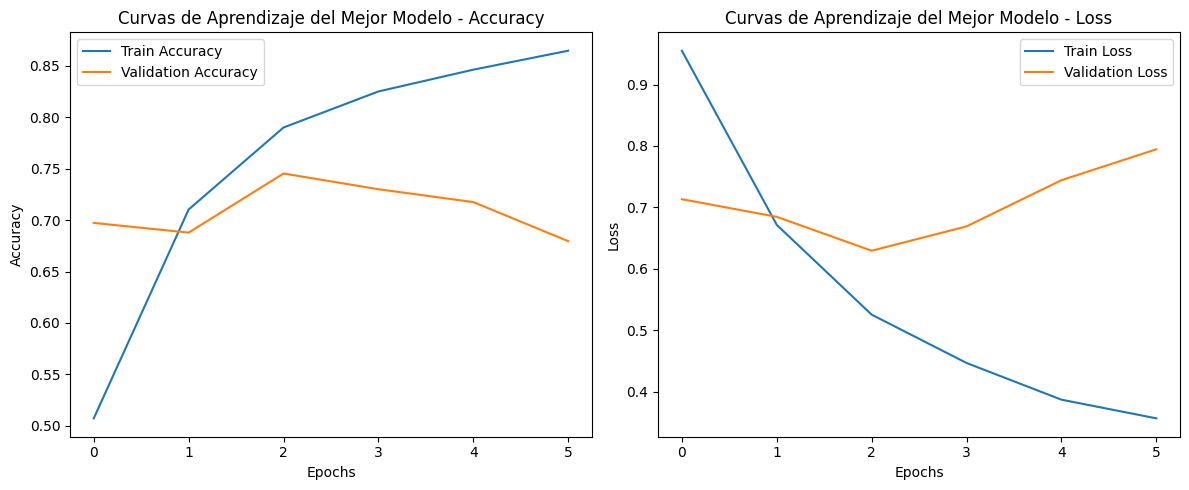


--- Evaluación de Mejor Modelo (Re-entrenado) en el Conjunto de Prueba ---
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step

Métricas de Evaluación (Mejor Modelo Encontrado por GridSearchCV):
Precisión (Accuracy): 0.7412
Precisión (Precision - Weighted): 0.7570
Exhaustividad (Recall - Weighted): 0.7512
Puntuación F1 (F1-score - Weighted): 0.7522
Kappa de Cohen: 0.6208

Reporte Detallado de Clasificación:
              precision    recall  f1-score   support

negative (0)       0.77      0.72      0.74      1157
 neutral (1)       0.68      0.78      0.73      1650
positive (2)       0.82      0.75      0.78      1698

    accuracy                           0.75      4505
   macro avg       0.76      0.75      0.75      4505
weighted avg       0.76      0.75      0.75      4505



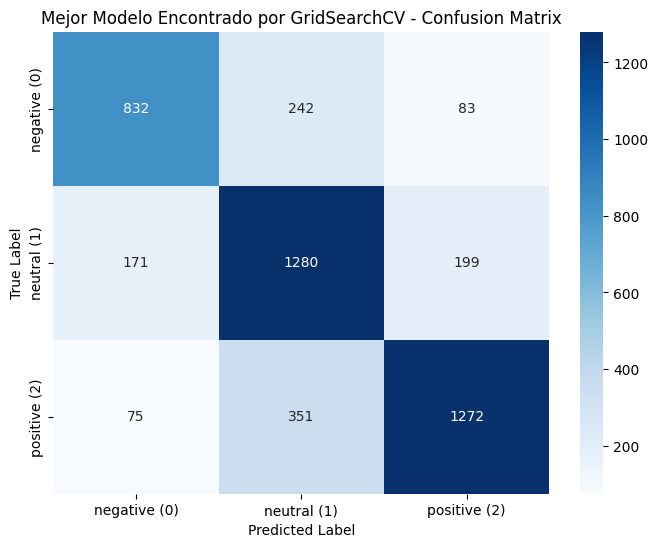

(array([2, 1, 1, ..., 1, 2, 1]), array([2, 2, 2, ..., 1, 2, 2]))

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             cohen_kappa_score, confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import History

from scikeras.wrappers import KerasClassifier

def plot_history(history, title):
    """
    Grafica el historial de entrenamiento y validación (accuracy y loss).
    """
    if not isinstance(history, History) or not history.history:
        print(f"Advertencia: No se pudo graficar el historial para '{title}' (objeto history no válido o vacío).")
        return

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    else:
        print("Advertencia: No se encontraron datos de 'val_accuracy' en el historial.")
    plt.title(f'{title} - Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    if 'loss' in history.history:
        plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    else:
        print("Advertencia: No se encontraron datos de 'val_loss' en el historial.")
    plt.title(f'{title} - Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, target_names, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{title} - Confusion Matrix')
    plt.show()

def evaluate_model(model, X_test, y_test_labels, target_names, model_name):
    print(f"\n--- Evaluación de {model_name} en el Conjunto de Prueba ---")
    
    y_pred_probs = model.predict(X_test)

    if y_pred_probs.ndim > 1 and y_pred_probs.shape[1] > 1:
        y_pred_labels = np.argmax(y_pred_probs, axis=1)
    else:
        y_pred_labels = y_pred_probs

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(y_test_labels, y_pred_labels)
    print(f"\nMétricas de Evaluación ({model_name}):")
    print(f"Precisión (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision - Weighted): {precision:.4f}")
    print(f"Exhaustividad (Recall - Weighted): {recall:.4f}")
    print(f"Puntuación F1 (F1-score - Weighted): {f1:.4f}")
    print(f"Kappa de Cohen: {kappa:.4f}")
    print("\nReporte Detallado de Clasificación:")
    print(classification_report(y_test_labels, y_pred_labels, target_names=target_names, zero_division=0))
    plot_confusion_matrix(y_test_labels, y_pred_labels, target_names, model_name)
    return y_test_labels, y_pred_labels

# --- Carga y preparación de datos ---
input_folder = '../data_processed'
input_filename = 'fifa_tweets_clean.csv'
input_csv_file = os.path.join(input_folder, input_filename)

df = pd.read_csv(input_csv_file)
df_clean = df[df['sentiment_label'] != -1].copy()
df_clean.dropna(subset=['test_clean', 'sentiment_label'], inplace=True)

texts = df_clean['test_clean'].astype(str).tolist()
labels = df_clean['sentiment_label'].astype(int).values
num_classes = len(np.unique(labels))

MAX_WORDS = 38000
MAX_LEN = 60
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<oov>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = labels

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Tamaño del conjunto para GridSearch: {X_train_val.shape[0]}")
print(f"Tamaño del conjunto de prueba final: {X_test.shape[0]}")


def create_model(neurons_l1=128, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        Input(shape=(MAX_LEN,), name="input_layer"),
        Embedding(input_dim=MAX_WORDS, output_dim=128),
        GlobalAveragePooling1D(),
        Dense(neurons_l1, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hiperparámetros
print("\n--- Iniciando Búsqueda de Hiperparámetros con GridSearchCV ---")

model_for_grid = KerasClassifier(
    model=create_model,
    verbose=0,
    loss="sparse_categorical_crossentropy",
)

param_grid = {
    'model__neurons_l1': [64, 128],
    'model__dropout_rate': [0.2, 0.4],
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [32,64],
    'epochs': [6,10]
}

grid_search = GridSearchCV(
    estimator=model_for_grid,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=1
)

grid_search_result = grid_search.fit(X_train_val, y_train_val)

print("\n--- Resultados de GridSearchCV ---")
print(f"Mejor puntuación (accuracy) en validación cruzada: {grid_search_result.best_score_:.4f}")
print("Mejores hiperparámetros encontrados:")
print(grid_search_result.best_params_)

print("\n--- Re-entrenando el mejor modelo en todo el conjunto de entrenamiento/validación ---")

best_params = grid_search_result.best_params_
best_neurons_l1 = best_params['model__neurons_l1']
best_dropout_rate = best_params['model__dropout_rate']
best_optimizer = best_params['optimizer']
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

# Nueva instancia del modelo
final_model = create_model(
    neurons_l1=best_neurons_l1,
    dropout_rate=best_dropout_rate,
    optimizer=best_optimizer
)
print("\nArquitectura del modelo final:")
final_model.summary()

# Modelo final y guardar el historial.
history = final_model.fit(
    X_train_val,
    y_train_val,
    epochs=best_epochs,
    batch_size=best_batch_size,
    validation_split=0.2,
    verbose=1
)

plot_history(history, "Curvas de Aprendizaje del Mejor Modelo")

target_names = ['negative (0)', 'neutral (1)', 'positive (2)']
evaluate_model(final_model, X_test, y_test, target_names, "Mejor Modelo (Re-entrenado)")